# Image Rescaling for Small Dataset

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import shutil

In [233]:
NUM_PEOP = set([])

In [319]:
small_image = os.listdir('SMALL_5K_IMAGES/')
small_mask = os.listdir('SMALL_5K_MASKS/')

In [320]:
np.array_equal(sorted([x.replace('_keypoints.json', '.jpg') for x in os.listdir('SMALL_5K_OPENPOSE/')]), 
               sorted(small_mask))

True

In [333]:
dataset = os.listdir('BIG_18K_OPENPOSE/')
#leeds_json = os.listdir('new_datasets/leeds_json/')

num_ = 0
valid_images = []
max_j = 0
small_dataset = []
min_joint = 1000

for j in dataset:
    num_people = len(json.load(open('BIG_18K_OPENPOSE/' + j))['people'])
    num_ += num_people
    
    if num_people == 1:
        joint_num = int(np.sum(np.array(json.load(open('BIG_18K_OPENPOSE/' + j))['people'][0]['pose_keypoints_2d']) != 0)/3)
        valid_images.append(j)
        min_joint = min(min_joint, joint_num)
        
        #if joint_num >= 22 and len(valid_images) < 7000:
         #   valid_images.append(j)
            #if joint_num == 25 :
            #    small_dataset.append(j.replace('_keypoints.json', '.jpg'))
        
#print("Mean Number of People: %f" % (num_/len(dataset)))
print("Valid Data: %d" % len(valid_images))
print("Min joint: %d" % min_joint)

Valid Data: 18601
Min joint: 22


In [264]:
valid_images

['020015024_keypoints.json',
 '4565_3164_keypoints.json',
 'dataset10k_5009_keypoints.json',
 '2500_366_keypoints.json',
 'dataset10k_3633_keypoints.json',
 '071257794_keypoints.json',
 '050256608_keypoints.json',
 'dataset10k_7500_keypoints.json',
 'dataset10k_7515_keypoints.json',
 '4565_2825_keypoints.json',
 'dataset10k_5241_keypoints.json',
 '006477220_keypoints.json',
 '2500_2315_keypoints.json',
 '4565_2830_keypoints.json',
 'dataset10k_4948_keypoints.json',
 'dataset10k_1172_keypoints.json',
 'dataset10k_1167_keypoints.json',
 'dataset10k_7748_keypoints.json',
 '074081766_keypoints.json',
 '040290962_keypoints.json',
 'dataset10k_9701_keypoints.json',
 'dataset10k_9714_keypoints.json',
 '086123223_keypoints.json',
 'dataset10k_5408_keypoints.json',
 '000267099_keypoints.json',
 'dataset10k_807_keypoints.json',
 '2500_772_keypoints.json',
 'dataset10k_7114_keypoints.json',
 'dataset10k_7101_keypoints.json',
 'dataset10k_3227_keypoints.json',
 'dataset10k_3232_keypoints.json',
 '

In [235]:
NUM_PEOP

{0, 1, 2, 3, 4}

In [171]:
len(valid_images)

332

In [251]:
for i in valid_images[:5000]:
    i = i.replace('_keypoints.json', '.jpg')
    copyfile("ORIGINAL_IMAGES/" + i, "new_images/" + i)

In [13]:
num_ = 0
valid_images_leeds = []

for j in leeds_json:
    num_people = len(json.load(open('new_datasets/leeds_json/' + j))['people'])
    num_ += num_people
    
    if num_people == 1:
        joint_num = int(np.sum(np.array(json.load(open('new_datasets/leeds_json/' + j))['people'][0]['pose_keypoints_2d']) != 0)/3)
        
        if joint_num >= 22:
            valid_images_leeds.append()
        
print("Mean Number of People: %f" % (num_/len(leeds_json)))
print("Valid Data: %d" % len(valid_images_leeds))

Mean Number of People: 6.077000
Valid Data: 382


In [10]:
num_ = 0
valid_images_leeds = []

for j in os.listdir('op_json'):
    num_people = len(json.load(open('op_json/' + j))['people'])
    num_ += num_people
    
    if num_people == 1:
        joint_num = int(np.sum(np.array(json.load(open('op_json/' + j))['people'][0]['pose_keypoints_2d']) != 0)/3)
        
        if joint_num >= 22:
            valid_images_leeds.append(j)
        
print("Mean Number of People: %f" % (num_/len(os.listdir('op_json'))))
print("Valid Data: %d" % len(valid_images_leeds))
print(len(os.listdir('op_json')))

Mean Number of People: 1.017642
Valid Data: 4810
4988


In [17]:
for img in valid_images:
    img_name = img.replace('_keypoints.json', '.jpg')
    img_ = cv2.imread('new_datasets/humanparsing/JPEGImages/' + img_name)
    
    if img_ is None:
        img_name = img.replace('_keypoints.json', '.png')
    
    os.rename('new_datasets/humanparsing/JPEGImages/' + img_name, "new_datasets/valid_dataset/" + img_name)

In [18]:
for img in valid_images_leeds:
    img_name = img.replace('_keypoints.json', '.jpg')
    img_ = cv2.imread('new_datasets/leeds_dataset/' + img_name)
    
    if img_ is None:
        img_name = img.replace('_keypoints.json', '.png')
    
    os.rename('new_datasets/leeds_dataset/' + img_name, "new_datasets/valid_dataset/" + img_name)

In [148]:
json_found_data = []

for img in os.listdir('IMG_JSON'):
    img_name = img.replace('_keypoints.json', '.jpg')
    json_found_data.append(img_name)

In [150]:
len(json_found_data)

40793

In [152]:
will_check = [x for x in os.listdir('RESCALED_IMAGES/') if x not in json_found_data]

In [158]:
len(will_check)

1724

In [157]:
len(os.listdir('RESCALED_IMAGES/'))

42517

In [20]:
print(len(valid_images))
print(len(valid_images_leeds))
print(len(valid_images)+len(valid_images_leeds))

14642
382
15024


***

In [330]:
dataset = sorted(os.listdir('BIG_18K_MASKS/'))
valid_data = []
invalid_data = []
resolution = defaultdict(list)

min_h, min_w, max_h, max_w, mean_w, mean_h = 1000, 1000, 0, 0, 0, 0

for img_name in dataset:
    
    img = cv2.imread('BIG_18K_MASKS/' + img_name, 0)
    #img = np.squeeze(img)
    
    min_h = min(min_h, img.shape[0])
    min_w = min(min_w, img.shape[1])
    max_h = max(max_h, img.shape[0])
    max_w = max(max_w, img.shape[1])
    
    mean_h += img.shape[0]
    mean_w += img.shape[1]
    

    if not (img.shape[0] >= 572 and img.shape[1] >= 572 and img.shape[0] < 1200 and img.shape[1] < 1200):
        invalid_data.append(img_name)
    else:
        valid_data.append(img_name)
        
mean_h /= len(dataset)
mean_w /= len(dataset)

In [322]:
print("Mean Height: %d" % mean_h)
print("Mean Width: %d" % mean_w)
print("Max Height: %d" % max_h)
print("Max Width: %d" % max_w)
print("Min Height: %d" % min_h)
print("Min Width: %d" % min_w)
print("Valid Data: %d" % len(valid_data))
print("Invalid Data: %d" % len(invalid_data))

Mean Height: 800
Mean Width: 697
Max Height: 1160
Max Width: 1160
Min Height: 576
Min Width: 576
Valid Data: 18601
Invalid Data: 0


In [331]:
print("Mean Height: %d" % mean_h)
print("Mean Width: %d" % mean_w)
print("Max Height: %d" % max_h)
print("Max Width: %d" % max_w)
print("Min Height: %d" % min_h)
print("Min Width: %d" % min_w)
print("Valid Data: %d" % len(valid_data))
print("Invalid Data: %d" % len(invalid_data))

Mean Height: 800
Mean Width: 697
Max Height: 1160
Max Width: 1160
Min Height: 576
Min Width: 576
Valid Data: 18601
Invalid Data: 0


In [66]:
len(os.listdir('ORIGINAL_IMAGES/'))

43572

In [69]:
len(inv_)

681

In [72]:
val_ = []
inv_ = []
resolution = defaultdict(list)

for i, img_name in enumerate(invalid_data):
    
    img = cv2.imread('ORIGINAL_IMAGES/' + img_name, 0)
    
    if img.all() == None:
        print(img_name)
    else:
        if img.shape[0] < 400 or img.shape[1] < 400:
            inv_.append(img_name)
        else:
            val_.append(img_name)

        if i % 10000 == 0:
            print(i)

0
10000
20000
30000
40000


In [36]:
len(inv_)

30371

In [60]:
len(valid_data)

2198

In [159]:
from shutil import copyfile

for img in will_check:
    copyfile('ORIGINAL_IMAGES/' + img, 'still_check/' + img)

In [14]:
img = cv2.imread('ORIGINAL_IMAGES/' + img_name, 0)
print(img.shape)
img = np.squeeze(img)
print(img.shape)

(1024, 768)
(1024, 768)


In [124]:
original = os.listdir('ORIGINAL_IMAGES/')
resized = os.listdir('RESCALED_IMAGES/')

In [125]:
diff = [x for x in original if x not in resized]

In [128]:
len(diff)+len(resized) == len(original)

True

In [328]:
dict_ = defaultdict(list)

for img in os.listdir('SMALL_5K_MASKS/'):
    img_ = cv2.imread('SMALL_5K_MASKS/' + img, 0)
    dict_[img_.shape].append(img) 

In [329]:
list(dict_.keys())

[(192, 128),
 (128, 228),
 (128, 171),
 (128, 192),
 (193, 128),
 (185, 128),
 (171, 128),
 (128, 174),
 (183, 128),
 (180, 128),
 (128, 166),
 (191, 128),
 (179, 128),
 (176, 128),
 (194, 128),
 (164, 128),
 (165, 128),
 (216, 128),
 (205, 128),
 (170, 128),
 (128, 175),
 (187, 128),
 (178, 128),
 (160, 128),
 (159, 128),
 (128, 160),
 (186, 128),
 (167, 128),
 (128, 170),
 (172, 128),
 (181, 128),
 (173, 128),
 (189, 128),
 (151, 128),
 (225, 128),
 (215, 128),
 (238, 128),
 (227, 128),
 (128, 213),
 (210, 128),
 (175, 128),
 (156, 128),
 (204, 128),
 (128, 139),
 (196, 128),
 (208, 128),
 (198, 128),
 (128, 172),
 (184, 128),
 (200, 128),
 (147, 128),
 (128, 191),
 (166, 128)]

In [187]:
dataset = os.listdir('SMALL_128_DATASET/')

In [256]:
len(os.listdir('SMALL_5K_IMAGES/'))

7000

# Rescaling Images with Bicubic Interpolation

In [252]:
for i in os.listdir('new_images'):
    img_ = cv2.imread('new_images/' + i)
    min_ = min(img_.shape[:2])
    resize_factor = 128/min_
    resized_img_ = cv2.resize(img_, (0,0), fx=resize_factor, fy=resize_factor, interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('SMALL_5K_IMAGES/' + i, resized_img_)

In [14]:
shape = defaultdict(list)

for i in os.listdir('SMALL_5K_IMAGES/'):
    img_ = cv2.imread('SMALL_5K_IMAGES/' + i)
    
    r = img_.shape[0]
    c = img_.shape[1]
    r_pad = 0
    c_pad = 0
        
    while r % 16 != 0:
        r_pad += 1
        r += 1

    while c % 16 != 0:
        c_pad += 1
        c += 1
            
    img_ = np.pad(img_, ((0, r_pad), (0, c_pad), (0, 0)), mode='constant', constant_values=0)
    shape[img_.shape].append(i)

In [10]:
shape

defaultdict(int,
            {(192, 128, 3): 4094,
             (128, 240, 3): 666,
             (128, 176, 3): 162,
             (128, 192, 3): 30,
             (208, 128, 3): 13,
             (176, 128, 3): 19,
             (224, 128, 3): 3,
             (160, 128, 3): 6,
             (128, 160, 3): 2,
             (240, 128, 3): 3,
             (128, 224, 3): 1,
             (128, 144, 3): 1})

In [13]:
sorted(shape.items(), key=lambda kv: -len(kv[1]))

[((192, 128, 3), 4094),
 ((128, 240, 3), 666),
 ((128, 176, 3), 162),
 ((128, 192, 3), 30),
 ((176, 128, 3), 19),
 ((208, 128, 3), 13),
 ((160, 128, 3), 6),
 ((224, 128, 3), 3),
 ((240, 128, 3), 3),
 ((128, 160, 3), 2),
 ((128, 224, 3), 1),
 ((128, 144, 3), 1)]

In [17]:
for img_name in dataset:
    
    img = cv2.imread('ORIGINAL_IMAGES/' + img_name, 0)
    #img = np.squeeze(img)
    """
    min_h = min(min_h, img.shape[0])
    min_w = min(min_w, img.shape[1])
    max_h = max(max_h, img.shape[0])
    max_w = max(max_w, img.shape[1])
    mean_h += img.shape[0]
    mean_w += img.shape[1]
    """

    if not (img.shape[0] >= 572 and img.shape[1] >= 572 and img.shape[0] < 1200 and img.shape[1] < 1200):
        invalid_data.append(img_name)
    else:
        valid_data.append(img_name)

In [11]:
print("Mean Height: %d" % mean_h)
print("Mean Width: %d" % mean_w)
print("Max Height: %d" % max_h)
print("Max Width: %d" % max_w)
print("Min Height: %d" % min_h)
print("Min Width: %d" % min_w)
print("Valid Data: %d" % len(valid_data))
print("Invalid Data: %d" % len(invalid_data))

Mean Height: 14370
Mean Width: 19157
Max Height: 1600
Max Width: 1920
Min Height: 258
Min Width: 42
Valid Data: 2198
Invalid Data: 42492


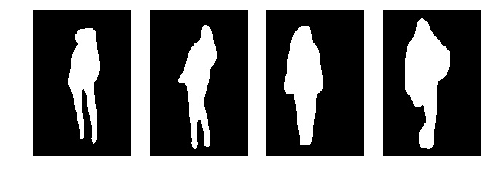

In [2]:
f, ax = plt.subplots(1,4, figsize=(8,6))
c_ = 32

for j in range(4):
    ax[j].imshow(cv2.cvtColor(cv2.imread('SMALL_5K_MASKS/' + os.listdir('SMALL_5K_MASKS/')[c_]), cv2.COLOR_BGR2RGB))
    c_ += 1
    ax[j].axis('off')